# Empathetic Dialogues

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import json

In [32]:
emp_df = pd.read_csv('./appraised_dialogues/google-t5_empdial_train.csv')
cols = list(emp_df.columns)
col_list = []
ind_list = []
for col in cols:
    if '_sp1' in col:
        col_list.append(col)
    elif '_sp2' in col:
        ind_list.append(col)

col_list.sort()
ind_list.sort()

emp_df_sp1 = emp_df[col_list]
emp_df_sp2 = emp_df[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(emp_df_sp1[col].corr(emp_df_sp2[ind]))

In [33]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,accept_conseq_sp1,attention_sp1,chance_control_sp1,chance_responsblt_sp1,effort_sp1,familiarity_sp1,goal_relevance_sp1,goal_support_sp1,not_consider_sp1,other_control_sp1,...,pleasantness_sp1,predict_conseq_sp1,predict_event_sp1,self_control_sp1,self_responsblt_sp1,social_norms_sp1,standards_sp1,suddenness_sp1,unpleasantness_sp1,urgency_sp1
accept_conseq_sp2,0.162374,-0.045529,-0.143796,-0.167343,-0.129425,0.123111,0.001772,0.206592,-0.218647,-0.013899,...,0.240251,0.102014,0.095699,0.152169,0.147774,-0.184202,-0.218641,-0.156111,-0.252885,-0.101588
attention_sp2,-0.027105,0.112209,0.034527,0.022837,0.100214,-0.038135,0.112507,-0.012114,0.035507,0.036687,...,-0.036980,0.037404,0.027326,-0.021065,-0.007027,0.019254,0.055107,0.027092,0.055217,0.039105
chance_control_sp2,-0.137506,0.036010,0.176807,0.194017,0.095765,-0.142875,-0.020662,-0.201734,0.195495,0.006647,...,-0.202024,-0.106067,-0.116579,-0.168177,-0.163256,0.148364,0.176257,0.182688,0.201945,0.110200
chance_responsblt_sp2,-0.179104,0.020725,0.192832,0.258055,0.106119,-0.139993,-0.031801,-0.251736,0.243516,-0.019540,...,-0.252431,-0.124483,-0.144605,-0.190932,-0.181111,0.195220,0.224771,0.206490,0.254175,0.110223
effort_sp2,-0.146809,0.087632,0.100400,0.117128,0.139971,-0.091523,0.066453,-0.175862,0.184759,0.070709,...,-0.163833,-0.070018,-0.106587,-0.152808,-0.153343,0.174960,0.203729,0.152349,0.174323,0.101898
familiarity_sp2,0.103571,-0.091019,-0.132309,-0.145481,-0.122840,0.255365,-0.022611,0.172028,-0.159704,-0.082660,...,0.166938,0.114833,0.164826,0.210588,0.182955,-0.148998,-0.167294,-0.252149,-0.165033,-0.177931
goal_relevance_sp2,-0.036383,0.108995,-0.000887,-0.014355,0.087597,-0.006469,0.195958,0.036667,-0.007790,0.047447,...,0.028886,0.058482,0.037077,-0.004724,0.026108,-0.014953,0.025972,-0.019982,-0.016107,0.030619
goal_support_sp2,0.170312,-0.025525,-0.202683,-0.249249,-0.151655,0.188743,0.100259,0.340575,-0.337450,0.033988,...,0.397485,0.191603,0.155478,0.204093,0.196633,-0.288227,-0.326660,-0.238072,-0.409621,-0.123121
not_consider_sp2,-0.183785,0.039714,0.202692,0.243823,0.159367,-0.165078,-0.075954,-0.335497,0.358439,-0.041932,...,-0.402790,-0.164965,-0.133478,-0.192626,-0.189186,0.281881,0.336196,0.225670,0.412430,0.101952
other_control_sp2,0.019587,0.062284,0.009050,-0.017896,0.085979,-0.066390,0.084241,0.080131,-0.080584,0.210017,...,0.072950,0.020143,0.011342,-0.018153,-0.040517,-0.014217,-0.022501,0.024856,-0.049459,0.102941


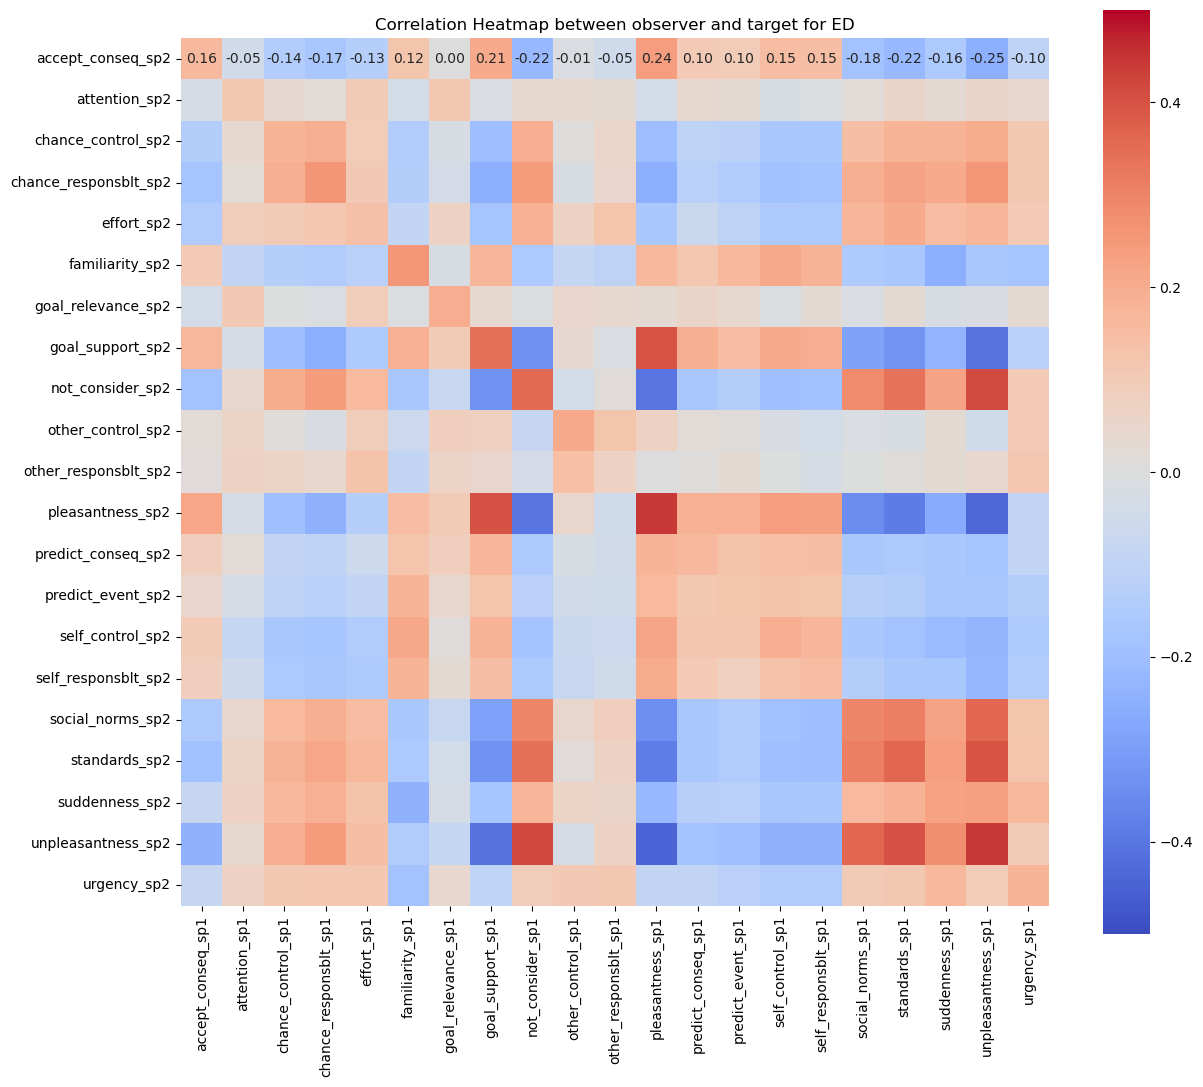

In [36]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap between observer and target for ED')
plt.show()

# ALOE

In [5]:
def plot_matrix(corr_matrix):
    plt.figure(figsize=(32, 24))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

In [51]:
df_aloe = pd.read_csv('./appraised_dialogues/google-t5_ALOE_train.csv')
cols = list(df_aloe.columns)
col_list = []
ind_list = []
for col in cols:
    if '_target_text' in col:
        col_list.append(col)
    elif '_observer_text' in col:
        ind_list.append(col)

col_list.sort()
ind_list.sort()

df_aloe_target = df_aloe[col_list]
df_aloe_observer = df_aloe[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(df_aloe_target[col].corr(df_aloe_observer[ind]))

In [52]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,accept_conseq_target_text,attention_target_text,chance_control_target_text,chance_responsblt_target_text,effort_target_text,familiarity_target_text,goal_relevance_target_text,goal_support_target_text,not_consider_target_text,other_control_target_text,...,pleasantness_target_text,predict_conseq_target_text,predict_event_target_text,self_control_target_text,self_responsblt_target_text,social_norms_target_text,standards_target_text,suddenness_target_text,unpleasantness_target_text,urgency_target_text
accept_conseq_observer_text,-0.026860,-0.049242,-0.033866,0.008977,-0.049861,0.028781,-0.025282,-0.075063,-0.022129,-0.002367,...,-0.071392,-0.007716,-0.013057,0.015181,0.045875,0.007106,0.003483,-0.023228,0.009285,-0.001216
attention_observer_text,0.018485,0.080296,-0.054260,0.007646,0.047607,-0.064089,0.098294,-0.000403,0.040892,-0.040412,...,-0.053788,0.025113,-0.032537,-0.005297,0.004152,0.052627,0.117555,0.011126,0.083511,-0.020751
chance_control_observer_text,-0.078742,0.002056,-0.004318,0.022937,-0.025494,-0.101576,0.044129,-0.053603,-0.013818,-0.017765,...,-0.017069,-0.020692,-0.042338,-0.076452,-0.033164,-0.034699,-0.009824,0.019530,0.018553,0.011154
chance_responsblt_observer_text,-0.021063,-0.100158,0.060948,0.074461,-0.099815,0.071837,-0.087047,-0.004295,0.000143,-0.037635,...,0.029702,0.064938,0.113463,0.059536,0.019320,-0.098285,-0.091212,-0.006553,0.012526,-0.128166
effort_observer_text,0.014803,0.112232,-0.016767,-0.012016,0.123439,-0.115553,0.140559,-0.091592,0.096997,0.010868,...,-0.049133,-0.123292,-0.130810,-0.111810,-0.132992,0.088970,0.125249,0.055911,0.069647,0.087078
familiarity_observer_text,-0.044767,-0.109602,-0.007243,-0.043120,-0.074100,0.165188,-0.102585,-0.052507,0.020679,-0.009019,...,-0.037962,0.108024,0.145818,0.136778,0.119800,-0.006658,-0.105408,-0.070281,0.013065,-0.116459
goal_relevance_observer_text,0.023679,0.156494,-0.021464,0.020244,0.121204,-0.097783,0.171168,0.032417,0.037918,-0.049578,...,-0.017345,0.009698,-0.097468,-0.036376,-0.033357,0.033620,0.118464,0.001699,0.052064,0.054633
goal_support_observer_text,-0.023533,-0.057464,-0.032569,-0.036617,-0.008505,0.048575,-0.011507,0.000942,-0.024675,-0.038658,...,-0.013523,0.035205,0.053187,0.058229,0.097081,-0.015056,-0.042839,0.013631,-0.049504,0.003860
not_consider_observer_text,0.009617,0.054090,-0.021369,-0.003023,-0.002951,-0.063251,0.035958,-0.052116,0.051614,0.010968,...,-0.027442,-0.015101,-0.056982,-0.051584,-0.057640,0.035879,0.067279,0.002923,0.066040,-0.015017
other_control_observer_text,-0.084204,0.053601,-0.096934,-0.056570,0.060564,-0.102884,0.117147,-0.039010,0.015724,0.039156,...,-0.035429,-0.058925,-0.129103,-0.102725,-0.064803,0.117324,0.109849,0.038477,-0.005189,0.092563


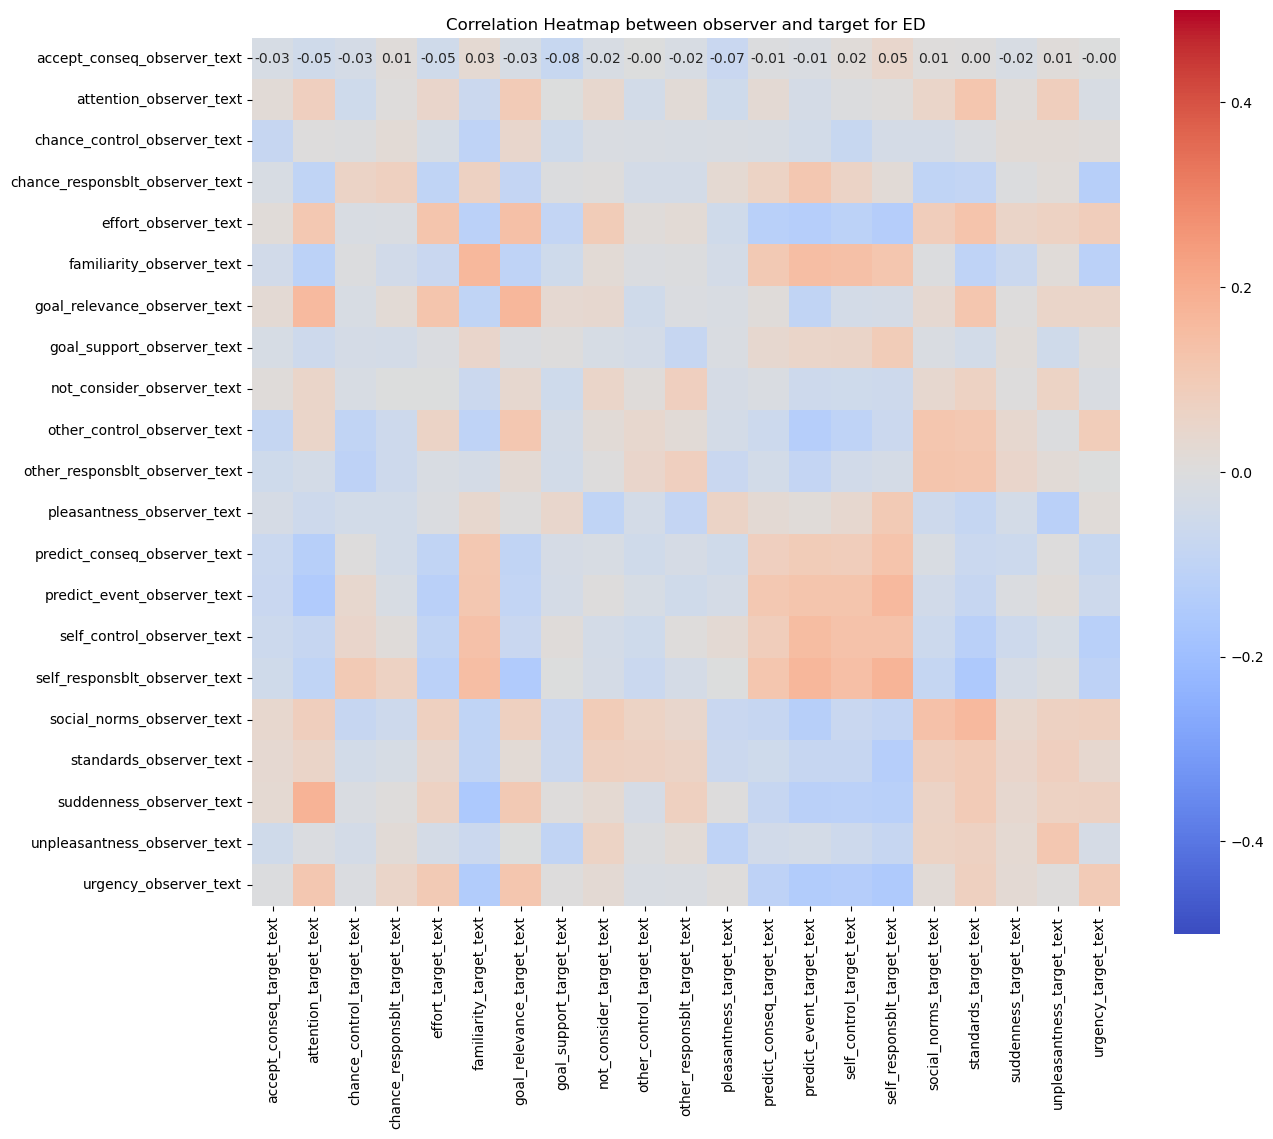

In [53]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap between observer and target for ED')
plt.show()

In [54]:
aloe_aligned_apps = [df_aloe['spans'][ix].split(',')[2] for ix in range(len(df_aloe['spans']))]
set(aloe_aligned_apps)

{" 'Advice'",
 " 'Anticipated Effort'",
 " 'Attentional Activity'",
 " 'Certainty'",
 " 'Objective Experience'",
 " 'Pleasantness'",
 " 'Self-Other Agency'",
 " 'Situational Control'",
 " 'Trope'"}

In [55]:
appraisals_to_consider = [
                          'Anticipated Effort', # effort
                          'Attentional Activity', # attention
                          'Certainty', # suddenness
                          'Pleasantness', # pleasantness
                          'Self-Other Agency', # self-responsibility, other responsibility
                          'Situational Control' # chance control
                         ]
ap2 = [ 'pleasantness', 'effort', 'attention', 'suddenness', 'self_responsblt', 'other_responsblt', 'chance_control']

In [56]:
cols = list(df_aloe.columns)
col_list = []
ind_list = []
for col in cols:
    for ap in ap2:
        if ap in col and '_target_text' in col:
            col_list.append(col)
        elif ap in col and '_observer_text' in col:
            ind_list.append(col)

col_list.sort()
ind_list.sort()

df_aloe_target = df_aloe[col_list]
df_aloe_observer = df_aloe[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(df_aloe_observer[ind].corr(df_aloe_target[col]))

In [57]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,attention_target_text,chance_control_target_text,effort_target_text,other_responsblt_target_text,pleasantness_target_text,self_responsblt_target_text,suddenness_target_text,unpleasantness_target_text
attention_observer_text,0.080296,-0.054260,0.047607,0.019054,-0.053788,0.004152,0.011126,0.083511
chance_control_observer_text,0.002056,-0.004318,-0.025494,-0.020318,-0.017069,-0.033164,0.019530,0.018553
effort_observer_text,0.112232,-0.016767,0.123439,0.021033,-0.049133,-0.132992,0.055911,0.069647
other_responsblt_observer_text,-0.036606,-0.105945,-0.019348,0.081556,-0.070405,-0.034798,0.049665,0.016361
pleasantness_observer_text,-0.056652,-0.040312,-0.010724,-0.085948,0.060880,0.105168,-0.036949,-0.119569
self_responsblt_observer_text,-0.098530,0.104335,-0.115396,-0.031911,-0.002464,0.177178,-0.028675,-0.005755
suddenness_observer_text,0.179862,-0.012276,0.066620,0.076977,0.002910,-0.121804,0.035402,0.068750
unpleasantness_observer_text,-0.010648,-0.036194,-0.032118,0.023015,-0.102547,-0.080532,0.030380,0.113427


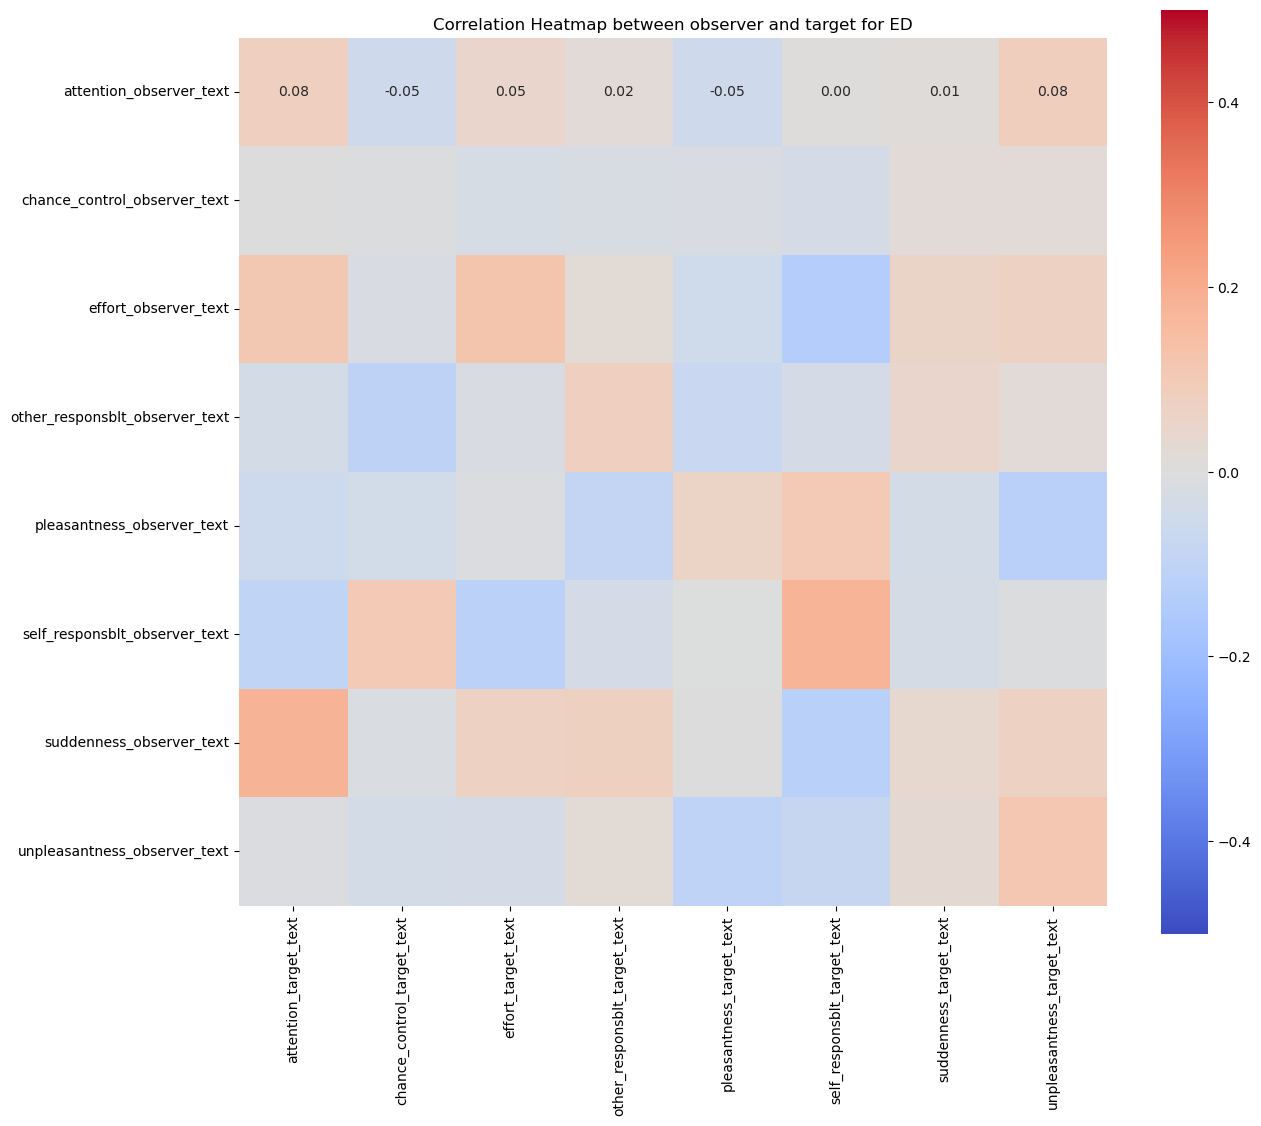

In [58]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap between observer and target for ED')
plt.show()

# EPITOME

In [40]:
epi_df = pd.read_csv('./appraised_dialogues/google-t5_epitome_train.csv')
cols = list(epi_df.columns)
col_list = []
ind_list = []
for col in cols:
    if '_seeker' in col:
        col_list.append(col)
    elif '_response' in col:
        ind_list.append(col)

col_list.sort()
ind_list.sort()

epi_df_seeker = epi_df[col_list]
epi_df_target = epi_df[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(epi_df_seeker[col].corr(epi_df_target[ind]))

In [41]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,accept_conseq_seeker_post,attention_seeker_post,chance_control_seeker_post,chance_responsblt_seeker_post,effort_seeker_post,familiarity_seeker_post,goal_relevance_seeker_post,goal_support_seeker_post,not_consider_seeker_post,other_control_seeker_post,...,pleasantness_seeker_post,predict_conseq_seeker_post,predict_event_seeker_post,self_control_seeker_post,self_responsblt_seeker_post,social_norms_seeker_post,standards_seeker_post,suddenness_seeker_post,unpleasantness_seeker_post,urgency_seeker_post
accept_conseq_response_post,0.043097,-0.037355,-0.031531,-0.054275,-0.086665,0.021952,-0.059692,0.072050,-0.087345,-0.033226,...,0.056613,0.014568,-0.003516,0.040036,0.042069,-0.086285,-0.075249,-0.060853,-0.099526,-0.023563
attention_response_post,-0.022053,0.097075,-0.008476,0.018694,0.077224,-0.070289,0.083155,-0.036240,0.014501,0.038631,...,-0.026468,-0.011441,-0.042168,-0.044232,-0.023769,0.060826,0.076391,0.034552,0.058483,0.037130
chance_control_response_post,-0.012111,0.006639,0.065602,0.056011,0.011101,-0.011587,-0.012273,-0.036248,0.024849,0.003042,...,-0.010079,-0.023866,0.011942,-0.032099,-0.049968,0.027284,0.024245,0.038908,0.027600,0.022647
chance_responsblt_response_post,-0.000694,0.001228,0.063089,0.123953,-0.006340,-0.008848,0.006331,-0.049006,0.047030,-0.029928,...,-0.021164,-0.004283,0.006399,-0.017567,-0.053273,0.024103,0.029652,0.024237,0.042994,0.005790
effort_response_post,-0.032724,0.084151,-0.029299,-0.003301,0.108038,-0.055033,0.103768,-0.032033,0.041675,0.036332,...,-0.034402,0.000302,-0.046037,-0.067673,-0.032059,0.083922,0.072730,0.034162,0.067724,0.007550
familiarity_response_post,0.002332,-0.057290,0.021171,0.003210,-0.064503,0.150221,-0.072378,0.023214,0.015748,-0.062958,...,-0.018367,0.010358,0.064148,0.112534,0.063338,-0.024518,-0.031407,-0.035681,-0.001577,-0.057382
goal_relevance_response_post,-0.034339,0.083604,-0.025450,-0.024290,0.093321,-0.091941,0.137830,-0.010858,-0.000820,0.064342,...,-0.009543,-0.006490,-0.042143,-0.056184,-0.009930,0.045070,0.067689,0.025318,0.033239,0.035613
goal_support_response_post,0.032647,-0.046959,-0.002673,-0.048340,-0.105027,0.037262,-0.024514,0.171944,-0.135493,-0.022389,...,0.154434,0.019353,0.048558,0.035617,0.070006,-0.156350,-0.155880,-0.066486,-0.172808,-0.033375
not_consider_response_post,-0.026817,0.047491,0.010941,0.053388,0.082365,-0.019808,0.015493,-0.130252,0.136138,-0.002407,...,-0.122457,-0.017273,-0.011488,-0.022067,-0.050690,0.144175,0.130502,0.047895,0.149523,0.010360
other_control_response_post,0.009279,0.028997,-0.019547,0.013713,0.014002,-0.083599,0.038450,-0.021639,-0.028337,0.101032,...,-0.010847,-0.007713,-0.037825,-0.041494,-0.022309,0.034413,0.061986,0.045563,0.009483,0.110106


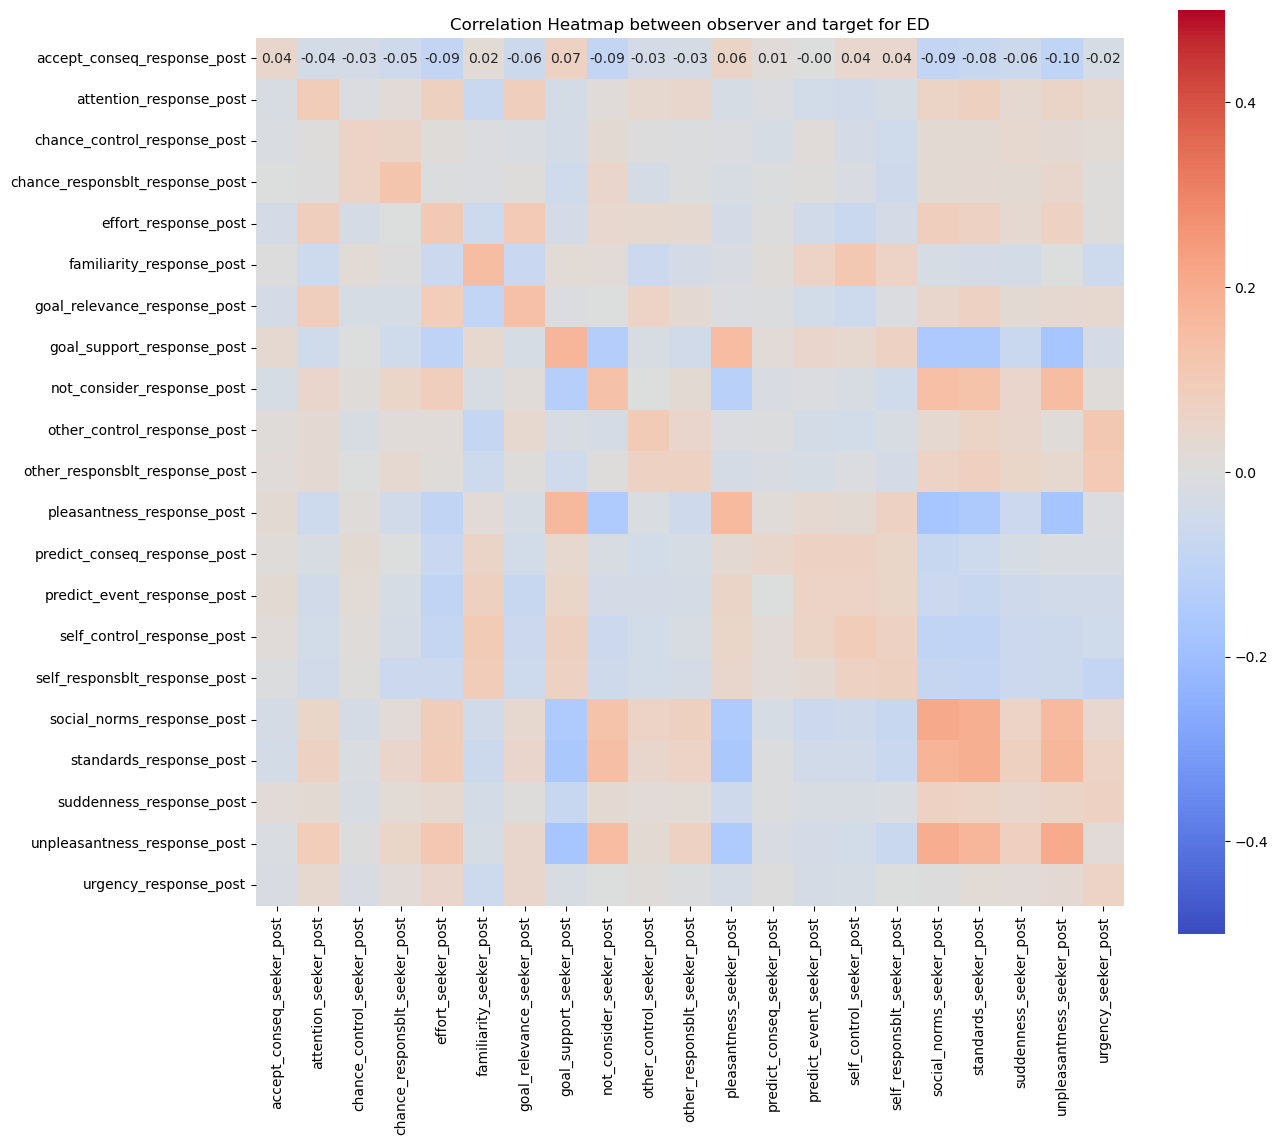

In [43]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap between observer and target for ED')
plt.show()

# WASSA Empathy

In [44]:
wassa_df = pd.read_csv('./appraised_dialogues/google-t5_wassa_train.csv')
cols = list(wassa_df.columns)
col_list = []
ind_list = []
for col in cols:
    if '_sp1' in col:
        col_list.append(col)
    elif '_sp2' in col:
        ind_list.append(col)

col_list.sort()
ind_list.sort()

wassa_df_sp1 = wassa_df[col_list]
wassa_df_sp2 = wassa_df[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(wassa_df_sp1[col].corr(wassa_df_sp2[ind]))

In [45]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,accept_conseq_sp1,attention_sp1,chance_control_sp1,chance_responsblt_sp1,effort_sp1,familiarity_sp1,goal_relevance_sp1,goal_support_sp1,not_consider_sp1,other_control_sp1,...,pleasantness_sp1,predict_conseq_sp1,predict_event_sp1,self_control_sp1,self_responsblt_sp1,social_norms_sp1,standards_sp1,suddenness_sp1,unpleasantness_sp1,urgency_sp1
accept_conseq_sp2,0.081150,-0.009410,-0.040997,-0.063932,-0.043863,0.043218,-0.004040,0.092149,-0.097967,-0.016440,...,0.102783,0.048156,0.012938,0.085449,0.081388,-0.084631,-0.090105,-0.047594,-0.109661,-0.015171
attention_sp2,0.008663,0.078573,-0.021262,-0.016776,0.048079,0.002272,0.071004,0.022193,-0.010277,0.052914,...,0.003646,0.036743,0.011331,-0.002797,-0.002115,0.015969,0.039328,0.003852,0.003580,0.002649
chance_control_sp2,-0.018688,-0.050960,0.117735,0.064305,0.007802,-0.017224,-0.011909,-0.018948,0.053145,-0.066386,...,-0.018397,-0.018670,-0.023173,0.007629,-0.004443,-0.013828,0.009727,0.046751,0.004044,0.101687
chance_responsblt_sp2,-0.066747,0.016886,0.079613,0.146190,0.040828,-0.057884,0.008602,-0.091827,0.109590,-0.018412,...,-0.118031,-0.042680,-0.028464,-0.082557,-0.092935,0.050213,0.083672,0.105575,0.108430,0.050089
effort_sp2,-0.023000,0.042044,0.022313,0.007431,0.082571,-0.008287,0.042435,-0.041230,0.062387,0.031029,...,-0.045439,0.005643,-0.008820,-0.025647,-0.022422,0.064323,0.084081,0.024431,0.050419,0.028338
familiarity_sp2,0.054061,-0.055251,-0.031494,-0.074119,-0.066492,0.126163,0.003856,0.123997,-0.090705,-0.035105,...,0.126165,0.067550,0.044113,0.127491,0.091375,-0.094381,-0.103641,-0.105786,-0.131350,-0.039006
goal_relevance_sp2,0.005465,0.051015,-0.005447,-0.024797,0.032409,0.047858,0.110302,0.095457,-0.050357,0.047665,...,0.074661,0.078066,0.048130,0.051590,0.046948,-0.052687,-0.017495,-0.047402,-0.067438,0.014551
goal_support_sp2,0.087596,-0.063935,-0.033666,-0.095727,-0.083299,0.120792,0.041096,0.245303,-0.213326,-0.014127,...,0.253073,0.115551,0.074263,0.181411,0.148789,-0.208795,-0.220371,-0.164022,-0.264725,-0.008469
not_consider_sp2,-0.070201,0.027891,0.055546,0.072767,0.071055,-0.060559,-0.021404,-0.169928,0.191559,-0.019441,...,-0.181420,-0.063608,-0.052217,-0.103152,-0.091441,0.149519,0.179925,0.122531,0.181617,0.033112
other_control_sp2,-0.026155,0.053593,-0.040709,-0.009473,0.049561,0.003146,0.053802,0.004957,-0.004584,0.113089,...,-0.016671,0.013457,0.017875,-0.016980,-0.028190,0.053841,0.054947,-0.002433,0.029445,-0.005631


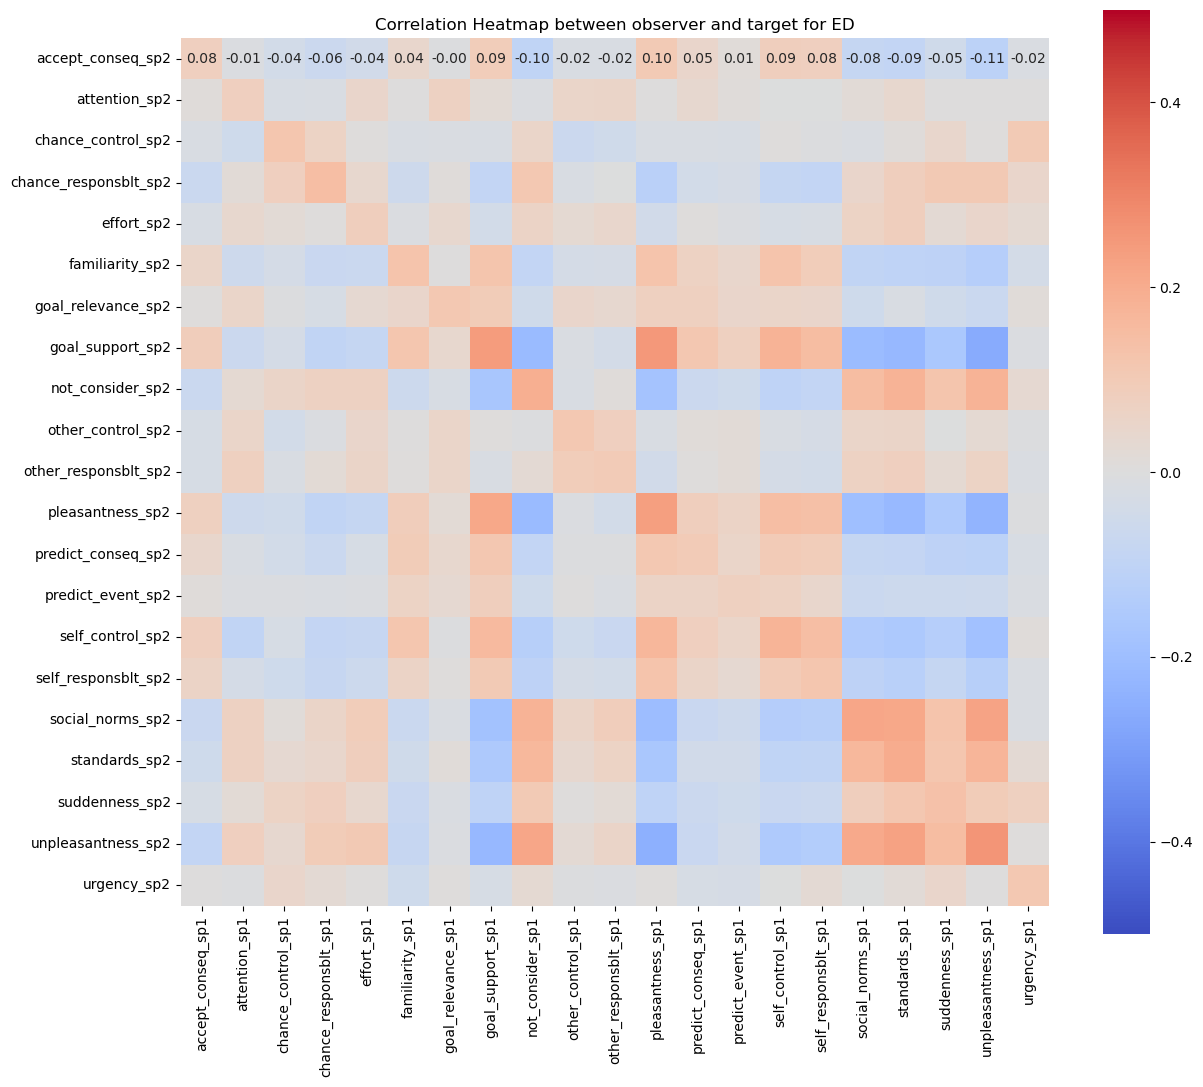

In [46]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap between observer and target for ED')
plt.show()

# Condolence

In [61]:
cond_df = pd.read_csv('./appraised_dialogues/google-t5_condolence_train.csv')
cols = list(cond_df.columns)
col_list = []
ind_list = []
for col in cols:
    if '_target' in col:
        col_list.append(col)
    elif '_observer' in col:
        ind_list.append(col)

col_list.sort()
ind_list.sort()

cond_df_target = cond_df[col_list]
cond_df_observer = cond_df[ind_list]
# corr_matrix_aloe_corr = df_aloe_target.corrwith(df_aloe_observer)
# print(corr_matrix_aloe_corr)
# # aloe target text plot
# plot_matrix(corr_matrix_aloe_corr)

correlation_data = {}

for col in col_list:
    for ind in ind_list:
        if col not in list(correlation_data.keys()):
            correlation_data[col] = list()
        correlation_data[col].append(cond_df_target[col].corr(cond_df_observer[ind]))

In [62]:
correlation_df = pd.DataFrame(correlation_data, index=ind_list)
correlation_df

,accept_conseq_target,attention_target,chance_control_target,chance_responsblt_target,effort_target,familiarity_target,goal_relevance_target,goal_support_target,not_consider_target,other_control_target,...,pleasantness_target,predict_conseq_target,predict_event_target,self_control_target,self_responsblt_target,social_norms_target,standards_target,suddenness_target,unpleasantness_target,urgency_target
accept_conseq_observer,0.046845,0.047791,-0.025645,-0.088506,0.039923,0.013224,0.059304,0.028617,0.023597,-0.031156,...,0.032331,-0.047353,-0.049088,0.010410,0.005252,0.014420,0.018154,-0.008131,-0.036560,0.026509
attention_observer,-0.005213,0.044516,0.003279,-0.058014,0.079855,-0.035098,0.052111,-0.011884,0.014030,0.045869,...,0.033981,-0.004541,-0.036298,-0.006849,-0.058591,0.061943,0.061731,0.055916,0.001148,0.035278
chance_control_observer,-0.061631,-0.053170,0.079740,0.072826,-0.015918,-0.089328,-0.076325,-0.076825,-0.039435,-0.011805,...,-0.022354,0.007627,-0.029952,-0.114813,-0.135968,-0.037127,-0.027850,0.061175,0.009042,0.003496
chance_responsblt_observer,-0.052222,-0.030800,0.042659,0.092250,-0.004652,-0.126103,-0.033819,-0.099549,-0.020627,0.021528,...,-0.038082,-0.067796,-0.104057,-0.138572,-0.180353,-0.016196,0.025141,0.032759,0.033392,0.040987
effort_observer,0.006065,0.084237,-0.032294,-0.035288,0.071667,-0.009419,0.092694,-0.049405,0.052410,0.075520,...,-0.000870,0.013708,-0.010283,0.014228,-0.001019,0.102159,0.056917,-0.007809,0.067624,0.056207
familiarity_observer,0.036259,-0.035458,-0.047990,-0.075683,-0.008146,0.120742,-0.002754,0.053304,-0.008991,-0.075526,...,0.013922,-0.025072,0.013446,0.052227,0.063904,-0.000889,-0.045600,-0.087182,-0.057101,-0.057413
goal_relevance_observer,-0.006676,0.078634,-0.080784,-0.087804,0.119833,-0.016817,0.144623,-0.037565,0.077071,0.038578,...,-0.006558,-0.044891,-0.040877,0.022447,0.020262,0.102418,0.099343,0.003995,0.012588,0.097450
goal_support_observer,0.016059,-0.021008,-0.068452,-0.090330,0.062123,-0.032338,0.052659,0.066381,-0.053996,-0.008071,...,0.053178,-0.061785,-0.070968,-0.002716,0.015055,0.001545,-0.035160,0.021157,-0.097683,0.075057
not_consider_observer,0.000020,-0.005120,0.036950,0.028705,-0.039940,0.022823,-0.040593,-0.061668,0.072181,0.023965,...,-0.068155,0.040612,0.028355,-0.010998,-0.030906,0.040293,0.054827,-0.003570,0.104416,-0.038951
other_control_observer,-0.057701,-0.046403,0.065401,0.068858,-0.038041,-0.059918,-0.004627,-0.061267,-0.000687,0.046804,...,-0.047338,0.007497,-0.025700,-0.043536,-0.063030,0.011517,0.005829,0.033577,0.051112,0.015880


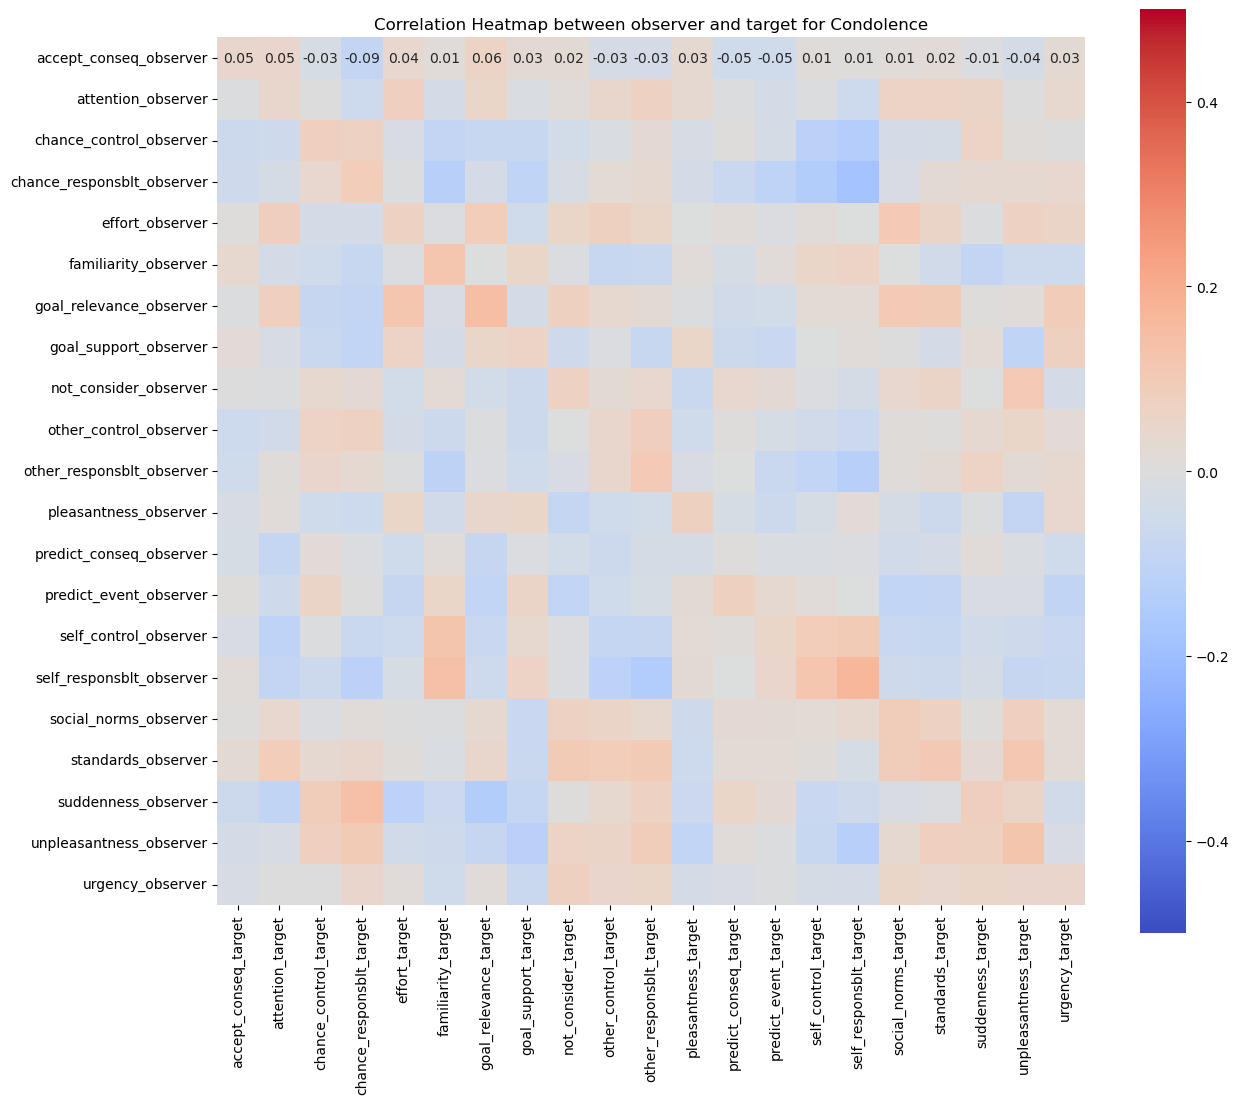

In [64]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt='.2f', square=True, vmin=-0.5, vmax=0.5)
plt.title('Correlation Heatmap between observer and target for Condolence')
plt.show()

In [65]:
correlation_df.columns

Index(['accept_conseq_target', 'attention_target', 'chance_control_target',
       'chance_responsblt_target', 'effort_target', 'familiarity_target',
       'goal_relevance_target', 'goal_support_target', 'not_consider_target',
       'other_control_target', 'other_responsblt_target',
       'pleasantness_target', 'predict_conseq_target', 'predict_event_target',
       'self_control_target', 'self_responsblt_target', 'social_norms_target',
       'standards_target', 'suddenness_target', 'unpleasantness_target',
       'urgency_target'],
      dtype='object')